[[1]
 [3]
 [0]
 [8]
 [7]
 [4]
 [5]
 [6]
 [2]]


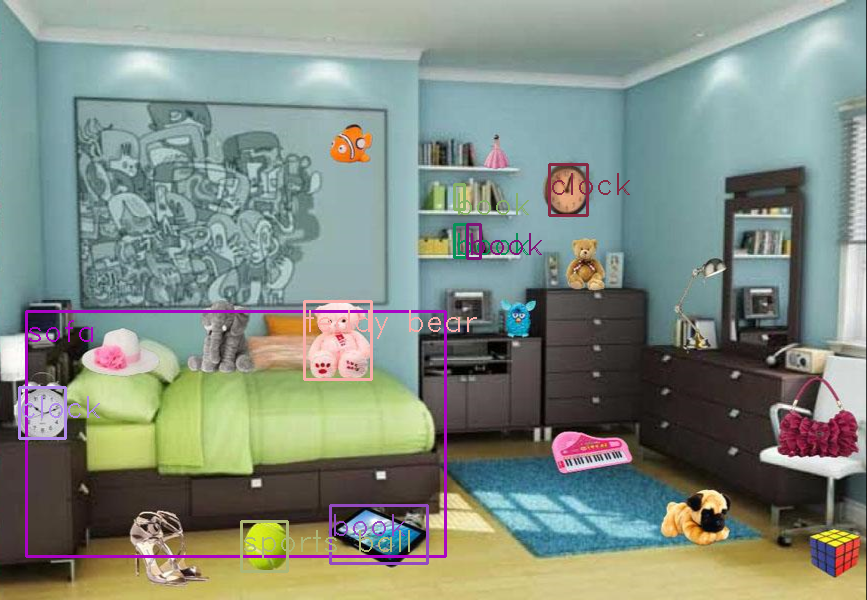

In [6]:
import cv2
import numpy as np


#Load YOLO
net =cv2.dnn.readNet("/content/drive/My Drive/ColabNotebooks/yolov3.weights", "/content/drive/My Drive/ColabNotebooks/yolov3.cfg")
classes = []
with open("/content/drive/My Drive/ColabNotebooks/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_name = net.getLayerNames()
outputLayers = [layer_name[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255,size=(len(classes), 3))

#Loading image
img = cv2.imread("/content/drive/My Drive/ColabNotebooks/img.png")

#img = cv2.resize(img, None, fx=0.8, fy=0.8)
height, width, channels = img.shape

#detecting Image
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, False)


#for b in blob:
#    for n, img_blob in enumerate(b):
#        cv2.imshow(str(n), img_blob)

net.setInput(blob)
outs = net.forward(outputLayers)
#print(outs)

class_ids = []
confidences = []
boxes = []
#showing info on screen:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            #Object Detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            #cv2.circle(img, (center_x,center_y), 10, (0, 255, 0), 2)

            #Rectangle Co-Ordinates:
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            #cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

#print(len(boxes))
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
number_objects_detected = len(boxes)
font = cv2.FONT_HERSHEY_DUPLEX
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        #print(label)
        cv2.rectangle(img, (x,y), (x+w,y+h), color, 2 )
        cv2.putText(img, label, (x, y + 30), font, 1, color, 1)


#Detecting Objects
#cv2.imshow('image',img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   157k      0 --:--:-- --:--:-- --:--:--  157k


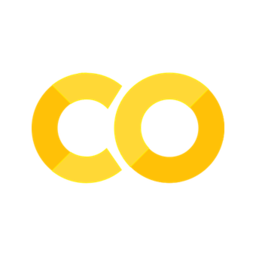

In [5]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)